# PREPROCESSING

## Importazione delle librerie necessarie
Iniziamo importando le librerie fondamentali per l'analisi dei dati e la visualizzazione.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurazione delle opzioni di visualizzazione per i DataFrame
pd.set_option('display.max_columns', None)

# Ignorare i warning per mantenere l'output pulito
import warnings
warnings.filterwarnings('ignore')

## Caricamento del dataset
Carichiamo il dataset `matches.csv` e visualizziamo le prime righe per avere un'idea del contenuto.

In [ ]:
# Caricamento del dataset
df = pd.read_csv('matches.csv')

# Visualizzazione delle prime righe del dataset
print("Prime righe del dataset:")
print(df.head())

Prime righe del dataset:
   Unnamed: 0        date           time            comp        round  day  \
0           0  2020-09-21  20:15 (21:15)  Premier League  Matchweek 2  Mon   
1           2  2020-09-27  16:30 (17:30)  Premier League  Matchweek 3  Sun   
2           4  2020-10-03  17:30 (18:30)  Premier League  Matchweek 4  Sat   
3           5  2020-10-17  17:30 (18:30)  Premier League  Matchweek 5  Sat   
4           7  2020-10-24  12:30 (13:30)  Premier League  Matchweek 6  Sat   

  venue result  gf  ga        opponent   xg  xga  poss  attendance  \
0  Away      W   3   1          Wolves  1.9  0.6    65         NaN   
1  Home      L   2   5  Leicester City  0.9  2.9    72         NaN   
2  Away      D   1   1    Leeds United  1.2  2.4    49         NaN   
3  Home      W   1   0         Arsenal  1.3  0.9    58         NaN   
4  Away      D   1   1        West Ham  1.0  0.3    69         NaN   

           captain formation         referee  match report  notes  sh  sot  \
0      

## Analisi preliminare del dataset
Eseguiamo un'analisi preliminare per comprendere la struttura del dataset, inclusi i tipi di dati, i valori mancanti e le statistiche descrittive.

In [ ]:
# Statistiche descrittive del dataset
print("\nStatistiche descrittive:")
print(df.describe())

# Informazioni generali sul dataset (tipi di dati, valori non nulli)
print("\nInformazioni sul dataset:")
print(df.info())


Statistiche descrittive:
        Unnamed: 0           gf           ga           xg          xga  \
count  4788.000000  4788.000000  4788.000000  4788.000000  4788.000000   
mean     63.044069     1.447995     1.405388     1.396512     1.364745   
std      42.865191     1.312635     1.286927     0.828847     0.814947   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      28.000000     0.000000     0.000000     0.800000     0.700000   
50%      62.000000     1.000000     1.000000     1.300000     1.200000   
75%      87.000000     2.000000     2.000000     1.900000     1.800000   
max     182.000000     9.000000     9.000000     7.000000     7.000000   

              poss    attendance  notes           sh          sot  \
count  4788.000000   3155.000000    0.0  4788.000000  4788.000000   
mean     50.432957  38397.586688    NaN    12.619256     4.261278   
std      12.810958  17595.849137    NaN     5.548444     2.459963   
min      18.000000   2000.00000

## Pulizia del dataset
Rimuoviamo le colonne non necessarie e convertiamo alcune colonne in tipi di dati più appropriati per l'analisi.

In [ ]:
# Rimozione delle colonne non necessarie
df.drop(columns=["Unnamed: 0", "comp", "round", "attendance", "match report", "notes"], inplace=True)

# Conversione della colonna 'date' in formato datetime
df["date"] = pd.to_datetime(df["date"])

# Conversione di alcune colonne in tipo 'category' per ottimizzare la memoria
df['venue'] = df['venue'].astype('category')
df['opponent'] = df['opponent'].astype('category')
df['team'] = df['team'].astype('category')
df['result'] = df['result'].astype('category')

# Aggiunta di una colonna 'day' per il giorno della settimana
df['day'] = df['date'].dt.day_name()

# Estrazione dell'ora dalla colonna 'time'
df["hour"] = df["time"].str.replace(":.+", "", regex=True).astype("int")

# Aggiunta di una colonna 'day_code' per il giorno della settimana (0 = Lunedì, 6 = Domenica)
df["day_code"] = df["date"].dt.dayofweek

# Verifica dei duplicati nel dataset
print("\nNumero di duplicati nel dataset:", df.duplicated().sum())

# Analisi delle formazioni più comuni
print("\nConteggio delle formazioni:")
print(df.formation.value_counts())


Numero di duplicati nel dataset: 0

Conteggio delle formazioni:
formation
4-2-3-1       1382
4-3-3         1025
4-4-2          583
3-4-3          548
3-5-2          266
4-1-4-1        258
4-4-1-1        141
3-4-1-2        113
5-3-2          107
5-4-1           99
4-5-1           49
4-3-1-2         47
4-1-2-1-2◆      35
4-2-2-2         29
3-1-4-2         25
4-3-2-1         22
3-2-4-1         21
3-3-3-1         17
3-5-1-1         14
3-4-3◆           3
4-1-3-2          2
4-2-4-0          2
Name: count, dtype: int64


## Pulizia e categorizzazione delle formazioni
Puliamo la colonna `formation` e categorizziamo le formazioni meno comuni come "Altro".

In [ ]:
# Rimozione di caratteri speciali dalla colonna 'formation'
df.formation = df.formation.str.replace("◆", "")
df.formation = df.formation.str.replace("-0", "")

# Categorizzazione delle formazioni meno comuni come "Altro"
value_counts = df.formation.value_counts()
to_replace = value_counts[value_counts < 107].index
df['formation'] = df['formation'].replace(to_replace, 'Altro')

# Verifica delle formazioni dopo la pulizia
print("\nConteggio delle formazioni dopo la pulizia:")
print(df.formation.value_counts())


Conteggio delle formazioni dopo la pulizia:
formation
4-2-3-1    1382
4-3-3      1025
4-4-2       583
3-4-3       551
Altro       362
3-5-2       266
4-1-4-1     258
4-4-1-1     141
3-4-1-2     113
5-3-2       107
Name: count, dtype: int64


## Gestione delle stagioni
Aggiustiamo la colonna `season` per riflettere correttamente l'anno della stagione calcistica.

In [ ]:
# Funzione per determinare la stagione corretta in base alla data
def get_correct_season(date):
    if isinstance(date, str):
        date = pd.to_datetime(date)
    if date.month >= 8:
        return date.year + 1
    else:
        return date.year

# Applicazione della funzione alla colonna 'date'
df['season'] = df['date'].apply(get_correct_season)

# Conteggio delle partite per stagione
print("\nConteggio delle partite per stagione:")
print(df['season'].value_counts().sort_index())


Conteggio delle partite per stagione:
season
2020     988
2021    1520
2022     760
2023     760
2024     760
Name: count, dtype: int64


## Calcolo dei punti e dei vincitori della stagione
Aggiungiamo una colonna `points` per i punti ottenuti in ogni partita e determiniamo i vincitori di ogni stagione.

In [ ]:
# Assegnazione dei punti in base al risultato (W = 3, D = 1, L = 0)
df['points'] = df['result'].apply(lambda x: 3 if x == 'W' else 1 if x == 'D' else 0)
df['points'] = df['points'].astype('int')

# Calcolo dei vincitori di ogni stagione
winners = df.groupby(['season', 'team'], observed=False)['points'].sum().reset_index() \
  .sort_values(['season', 'points'], ascending=[True, False]) \
  .groupby('season', observed=False).first()

# Aggiunta della colonna 'season_winner' per indicare il vincitore della stagione
df['season_winner'] = df['season'].map(winners['team'])

## Analisi dei capitani
Analizziamo i capitani delle squadre e rimuoviamo i valori mancanti.

In [ ]:
# Funzione per gestire i valori mancanti nella colonna 'captain'
def captains_func(data):
    if data['count'] == 0:
        data['count'] = np.nan
    return data

# Conteggio dei capitani per squadra
group = df.groupby('team', observed=False)['captain'].value_counts().reset_index(name='count')
group = group.apply(captains_func, axis=1)
group.dropna(inplace=True)
group = group.drop(columns='count')

# Esempio: Capitani del Liverpool
print("\nCapitani del Liverpool:")
print(group[group['team'] == 'Liverpool'])


Capitani del Liverpool:
           team                 captain
2136  Liverpool        Jordan Henderson
2137  Liverpool         Virgil van Dijk
2138  Liverpool            James Milner
2139  Liverpool     Georginio Wijnaldum
2140  Liverpool        Andrew Robertson
2141  Liverpool         Roberto Firmino
2142  Liverpool  Trent Alexander-Arnold


## Ordinamento del dataset
Ordiniamo il dataset per squadra e data per facilitare l'analisi temporale.

In [ ]:
# Conversione della colonna 'date' in formato datetime (se non già fatto)
df['date'] = pd.to_datetime(df['date'])

# Ordinamento del dataset per squadra e data
df_sorted = df.sort_values(['team', 'date'])

# Reset dell'indice per riflettere il nuovo ordine
df_sorted = df_sorted.reset_index(drop=True)

# Funzione per verificare l'ordinamento corretto
def verify_sorting(data):
    is_sorted = data.groupby('team', observed=False)['date'].is_monotonic_increasing.all()
    if is_sorted:
        print("Data is correctly sorted by date for each team.")
    else:
        print("WARNING: Data is not correctly sorted. Please check for inconsistencies.")

# Verifica dell'ordinamento
verify_sorting(df_sorted)

Data is correctly sorted by date for each team.


## Calcolo delle metriche avanzate
Calcoliamo metriche avanzate come il rapporto tra calci piazzati e tiri (`fk_ratio`) e il tasso di conversione dei rigori (`pk_conversion_rate`).

In [ ]:
# Conversione delle colonne numeriche in tipo float
num_cols = ['sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'xga', 'xg', 'gf', 'ga']
for col in num_cols:
    df_sorted[col] = pd.to_numeric(df_sorted[col])

# Funzione per calcolare le metriche avanzate
def calculate_fk_pk_ratios(data):
    data['fk_ratio'] = data['fk'] / data['sh']
    data['pk_conversion_rate'] = data['pk'] / data['pkatt']
    data['pk_per_shot'] = data['pkatt'] / data['sh']

    # Gestione dei valori infiniti
    data['fk_ratio'] = data['fk_ratio'].replace([np.inf, -np.inf], np.nan)
    data['pk_conversion_rate'] = data['pk_conversion_rate'].replace([np.inf, -np.inf], np.nan)
    data['pk_per_shot'] = data['pk_per_shot'].replace([np.inf, -np.inf], np.nan)

    # Conversione in percentuali
    data['fk_percentage'] = data['fk_ratio'] * 100
    data['pk_conversion_percentage'] = data['pk_conversion_rate'] * 100
    data['pk_per_shot_percentage'] = data['pk_per_shot'] * 100

    return data

# Applicazione della funzione
df_sorted = calculate_fk_pk_ratios(df_sorted)

# Rimozione delle colonne non necessarie
df_sorted.drop(['pk_conversion_rate', 'pk_conversion_percentage'], axis=1, inplace=True)

## Visualizzazione delle distribuzioni
Visualizziamo le distribuzioni delle metriche calcolate utilizzando istogrammi e boxplot.

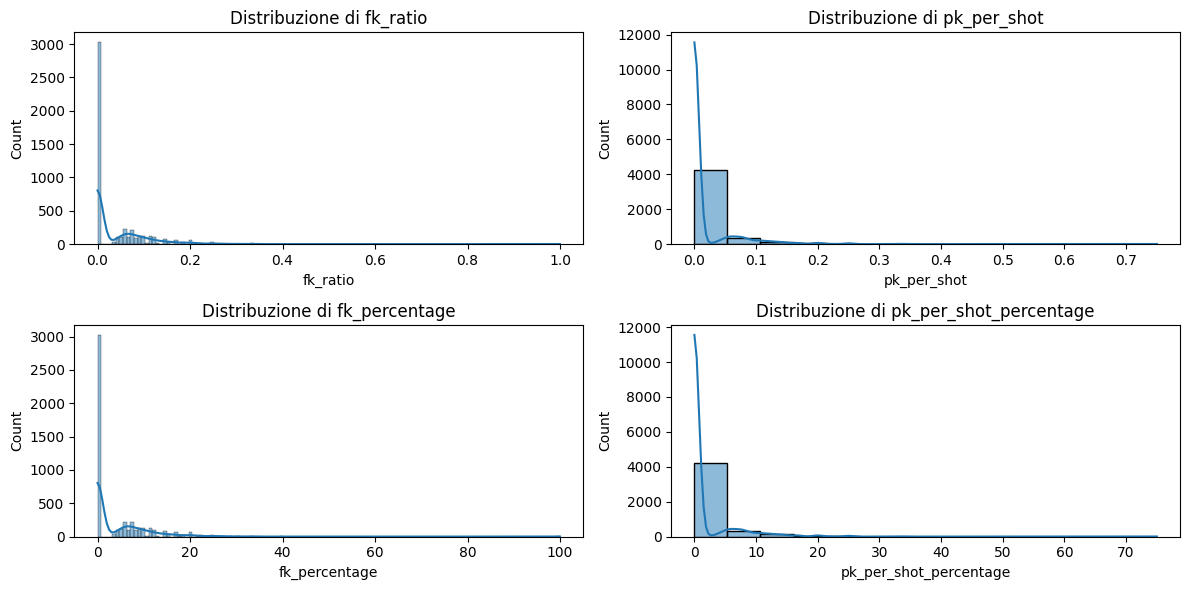


Statistiche delle metriche calcolate:
      fk_ratio  pk_per_shot  fk_percentage  pk_per_shot_percentage
mean  0.037938     0.013427       3.793808                 1.34271
min   0.000000     0.000000       0.000000                 0.00000
max   1.000000     0.750000     100.000000                75.00000


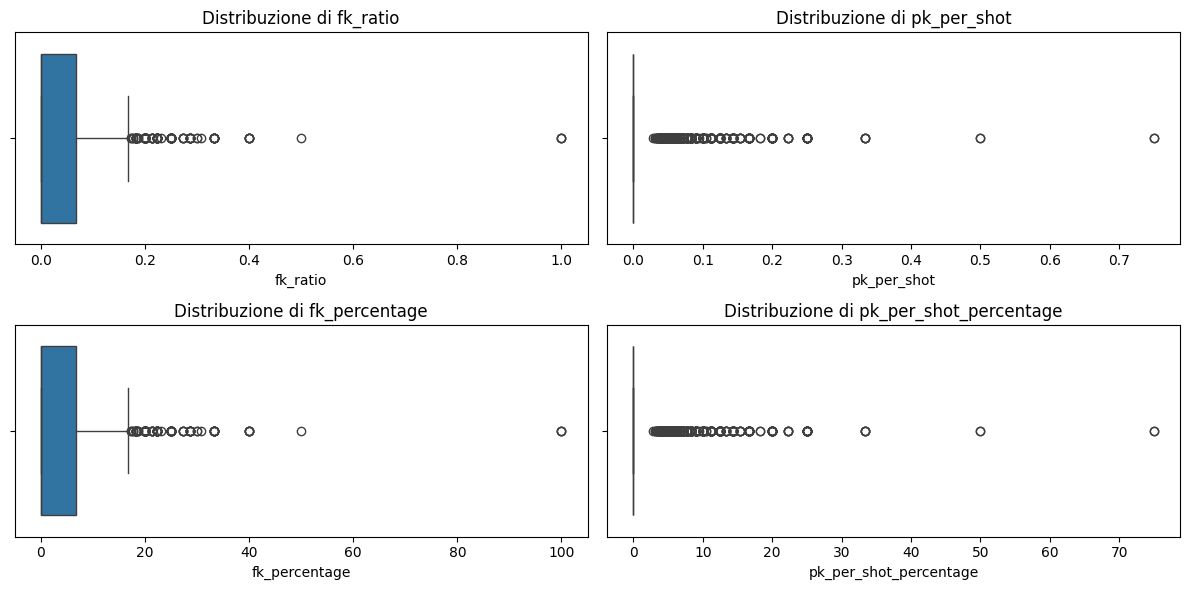

In [ ]:
# Creazione di una figura con 4 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
i = 0
for col in ['fk_ratio', 'pk_per_shot', 'fk_percentage', 'pk_per_shot_percentage']:
    sns.histplot(df_sorted[col], kde=True, ax=axs.flatten()[i])
    axs.flatten()[i].set_title('Distribuzione di ' + col)
    i += 1

plt.tight_layout()
plt.show()

# Boxplot per le stesse metriche
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
i = 0
for col in ['fk_ratio', 'pk_per_shot', 'fk_percentage', 'pk_per_shot_percentage']:
    sns.boxplot(x=df_sorted[col], ax=axs.flatten()[i])
    axs.flatten()[i].set_title('Distribuzione di ' + col)
    i += 1

# Statistiche descrittive delle metriche
print("\nStatistiche delle metriche calcolate:")
print(df_sorted[['fk_ratio', 'pk_per_shot', 'fk_percentage', 'pk_per_shot_percentage']].agg(['mean', 'min', 'max']))

plt.tight_layout()
plt.show()

## Calcolo delle medie mobili
Calcoliamo le medie mobili per metriche come `xg`, `xga`, `poss`, `sh`, `sot` e `dist`.

In [ ]:
# Funzione per calcolare la media mobile
def calculate_rolling_average(data, column, window=5):
    return data.groupby('team', observed=False)[column].transform(
        lambda x: x.rolling(window=window, min_periods=1).mean()
    )

# Applicazione della funzione alle colonne selezionate
df_sorted['rolling_xg'] = calculate_rolling_average(df_sorted, 'xg')
df_sorted['rolling_xga'] = calculate_rolling_average(df_sorted, 'xga')
df_sorted['rolling_poss'] = calculate_rolling_average(df_sorted, 'poss')
df_sorted['rolling_sh'] = calculate_rolling_average(df_sorted, 'sh')
df_sorted['rolling_sot'] = calculate_rolling_average(df_sorted, 'sot')
df_sorted['rolling_dist'] = calculate_rolling_average(df_sorted, 'dist')

# Codifica del risultato in valori numerici (W = 1, D = 0, L = -1)
df_sorted['result_encoded'] = pd.to_numeric(df_sorted['result'].map({'W': 1, 'D': 0, 'L': -1}))

# Calcolo della forma (media mobile dei risultati)
df_sorted['form'] = calculate_rolling_average(df_sorted, 'result_encoded')

# Calcolo della differenza reti e della sua media mobile
df_sorted['goal_diff'] = df_sorted['gf'] - df_sorted['ga']
df_sorted['rolling_goal_diff'] = calculate_rolling_average(df_sorted, 'goal_diff')

## Aggiunta del confronto diretto (head-to-head)
Aggiungiamo una colonna per il confronto diretto tra squadre.

In [ ]:
# Funzione per calcolare il confronto diretto
def get_head_to_head(data):
    h2h = data.groupby(['team', 'opponent'], observed=False)['result_encoded'].mean().reset_index()
    h2h = h2h.rename(columns={'result_encoded': 'h2h_record'})
    result = pd.merge(data, h2h, on=['team', 'opponent'], how='left')
    return result

# Applicazione della funzione
df_sorted = get_head_to_head(df_sorted)

## Aggiunta di informazioni temporali
Aggiungiamo informazioni sul giorno della settimana e sulla fascia oraria delle partite.

In [ ]:
# Conversione della data in giorno della settimana (0 = Lunedì, 6 = Domenica)
df_sorted['day_of_week'] = pd.to_datetime(df_sorted['date']).dt.dayofweek

# Funzione per categorizzare l'orario delle partite
def categorize_time(time):
    hour = pd.to_datetime(time).hour
    if hour < 12:
        return 'early'
    elif hour < 17:
        return 'afternoon'
    else:
        return 'evening'

# Pulizia della colonna 'time' e applicazione della categorizzazione
df_sorted['time'] = df_sorted['time'].apply(lambda x: x.split(' ')[0])
df_sorted['time_condition'] = df_sorted['time'].apply(categorize_time)

# Conteggio delle partite per fascia oraria
print("\nConteggio delle partite per fascia oraria:")
print(df_sorted['time_condition'].value_counts())


Conteggio delle partite per fascia oraria:
time_condition
afternoon    2783
evening      2005
Name: count, dtype: int64


## Calcolo dei giorni trascorsi dall'ultima partita
Aggiungiamo una colonna per calcolare i giorni trascorsi dall'ultima partita di ogni squadra.

In [ ]:
# Calcolo dei giorni trascorsi dall'ultima partita
df_sorted['days_since_last_match'] = df_sorted.groupby('team', observed=False)['date'].diff().dt.days
df_sorted['days_since_last_match'] = df_sorted['days_since_last_match'].fillna(0)

## Salvataggio del dataset pre-processato
Salviamo il dataset pre-processato in un file CSV per l'utilizzo successivo.

In [ ]:
# Salvataggio del dataset pre-processato
df_sorted.to_csv('matches_final.csv', index=False)

## Preparazione per il training
Rimuoviamo le colonne non necessarie e separiamo il dataset in training e test set.

In [ ]:
# Rimozione delle colonne non necessarie
columns_to_drop = ['gf', 'ga', 'xg', 'xga', 'poss', 'sh', 'sot',
                   'goal_diff', 'day', 'pk', 'pkatt', 'fk',
                   'referee', 'dist','points', 'season_winner', 'hour', 'result_encoded', 'day_code']
df_sorted = df_sorted.drop(columns=columns_to_drop)

# Selezione delle colonne numeriche e categoriche
num_cols = df_sorted.select_dtypes(include=np.number).columns
num_cols = num_cols.drop(['season'])
num_cols = num_cols.tolist()
cat_cols = df_sorted.select_dtypes(exclude=np.number).columns
cat_cols = cat_cols.drop(['result', 'date'])
cat_cols = cat_cols.tolist()
predictors = num_cols + cat_cols

# Divisione del dataset in training e test set
train = df_sorted[df_sorted["season"] <= 2023]
test = df_sorted[df_sorted["season"] > 2023]

# Salvataggio dei dataset
train.to_csv("training_set.csv", index=False)
test.to_csv("test_set.csv", index=False)

# Conteggio delle partite per stagione
print("\nConteggio delle partite per stagione:")
print(df_sorted["season"].value_counts())


Conteggio delle partite per stagione:
season
2021    1520
2020     988
2022     760
2023     760
2024     760
Name: count, dtype: int64


# TRAINING

## Importazione delle librerie necessarie
Iniziamo importando le librerie fondamentali per il training del modello, la preelaborazione dei dati e la valutazione delle prestazioni.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras.utils import to_categorical
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import itertools

## Caricamento e preparazione del dataset
Carichiamo il dataset pre-processato (`matches_final.csv`) e rimuoviamo le colonne non necessarie. Successivamente, separiamo le variabili categoriche da quelle numeriche.

In [ ]:
# Caricamento del dataset pre-processato
tr = pd.read_csv("matches_final.csv", index_col=False)

# Rimozione delle colonne non necessarie
columns_to_drop = ['gf', 'ga', 'xg', 'xga', 'poss', 'sh', 'sot',
                   'goal_diff', 'day', 'pk', 'pkatt', 'fk',
                   'referee', 'dist','points', 'season_winner', 'hour', 'result_encoded', 'day_code']
tr = tr.drop(columns=columns_to_drop)

# Selezione delle colonne numeriche e categoriche
num_cols = tr.select_dtypes(include=np.number).columns
num_cols = num_cols.drop(['season'])
num_cols = num_cols.tolist()
cat_cols = tr.select_dtypes(exclude=np.number).columns
cat_cols = cat_cols.drop(['result', 'date'])

# Rimozione delle righe con valori mancanti
tr.dropna(inplace=True)

# Pulizia dei nomi delle colonne
tr.columns = tr.columns.str.strip()
tr = tr[tr.columns.tolist()[1:]]

# Categorizzazione della colonna 'time'
tr['time'] = tr['time'].astype('category')
value_counts = tr.time.value_counts()
to_replace = value_counts[value_counts < 102].index
tr['time'] = tr['time'].replace(to_replace, 'Altro')

# Aggiornamento delle colonne categoriche e numeriche
cat_cols = tr.select_dtypes(exclude=np.number).columns.tolist()
num_cols = tr.select_dtypes(include=np.number).columns.tolist()
predictors = num_cols + cat_cols

## Preparazione delle feature e del target
Separiamo le feature (`X`) dal target (`y`) e applichiamo la codifica one-hot alle variabili categoriche e la standardizzazione a quelle numeriche.

In [ ]:
# Separazione delle feature (X) e del target (y)
X = tr.drop('result', axis=1)
y = tr['result']

# Identificazione delle colonne categoriche e numeriche
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# One-Hot Encoding per le variabili categoriche
X_categorical_encoded = pd.get_dummies(X[categorical_cols], columns=categorical_cols)

# Standardizzazione delle variabili numeriche
scaler = StandardScaler()
X_numerical_scaled = pd.DataFrame(scaler.fit_transform(X[numerical_cols]), columns=numerical_cols)

# Unione delle variabili categoriche codificate e numeriche standardizzate
X_categorical_encoded = X_categorical_encoded.reset_index(drop=True)
X_numerical_scaled = X_numerical_scaled.reset_index(drop=True)
X_final = pd.concat([X_categorical_encoded, X_numerical_scaled], axis=1)

# Codifica del target (y) in valori numerici
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

## Creazione del test set
Separiamo l'ultima stagione come test set e salviamo i dati in un file CSV.

In [ ]:
# Creazione del test set (ultima stagione)
test_x = X_final.tail(761)
test_y = y_encoded[-761:]
test_x['result'] = test_y
test_x.to_csv("test_set.csv", index=False)

# Rimozione dell'ultima stagione dal training set
X_final = X_final.iloc[:-761]
y_encoded = y_encoded[:-761]

## Divisione in training e validation set
Dividiamo il dataset in training set (80%) e validation set (20%).

In [ ]:
# Divisione in training e validation set
X_train, X_val, y_train, y_val = train_test_split(X_final, y_encoded, test_size=0.2, random_state=42)

## Definizione del modello di rete neurale
Definiamo una funzione per creare una rete neurale con parametri variabili.

In [ ]:
# Funzione per creare una rete neurale
def create_network(input_dim, neurons_1layer, neurons_2layer, activation_function):
    inputs = tf.keras.Input((input_dim,))
    x = layers.Dense(neurons_1layer, activation_function)(inputs)
    x = layers.Dense(neurons_2layer, activation_function)(x)
    x = layers.Dropout(0.1)(x)
    output = layers.Dense(3, "softmax")(x)
    model = tf.keras.Model(inputs=inputs, outputs=output, name="neural_net")
    return model

## Ricerca degli iperparametri ottimali
Eseguiamo una ricerca a griglia per trovare la combinazione ottimale di iperparametri.

In [ ]:
# Griglia di iperparametri
GRID_SEARCH = {
    "learning_rate": [1e-3],
    "epochs": [5, 6, 7, 8, 9, 10],
    "neurons_1layer": [50, 55],
    "neurons_2layer": [30, 50],
    "activation_functions": ['relu', 'sigmoid', 'tanh'],
    "batch_size": [200]
}

# Creazione di tutte le combinazioni di iperparametri
grid_combinations = list(itertools.product(
    GRID_SEARCH['learning_rate'],
    GRID_SEARCH['epochs'],
    GRID_SEARCH['neurons_1layer'],
    GRID_SEARCH['neurons_2layer'],
    GRID_SEARCH['activation_functions'],
    GRID_SEARCH['batch_size']
))

# Variabili per tenere traccia dei migliori iperparametri
best_params = None
best_val_loss = np.inf

# Ciclo per testare ogni combinazione di iperparametri
for combination in grid_combinations:
    learning_rate, epochs, neurons_1layer, neurons_2layer, activation_function, batch_size = combination

    print(f"Testing combination: lr={learning_rate}, epochs={epochs}, neurons_1layer={neurons_1layer}, neurons_2layer={neurons_2layer}, activation={activation_function}, batch_size={batch_size}")

    # Creazione del modello con i parametri correnti
    model = create_network(X_train.shape[1], neurons_1layer, neurons_2layer, activation_function)

    # Compilazione del modello
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )

    # Addestramento del modello
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=0  # Nessun output durante la ricerca
    )

    # Valutazione della loss sul validation set
    final_val_loss = history.history['val_loss'][-1]

    print(f"Validation loss: {final_val_loss}")

    # Aggiornamento dei migliori iperparametri
    if final_val_loss < best_val_loss:
        best_val_loss = final_val_loss
        best_params = {
            "learning_rate": learning_rate,
            "epochs": epochs,
            "neurons_1layer": neurons_1layer,
            "neurons_2layer": neurons_2layer,
            "activation_function": activation_function,
            "batch_size": batch_size
        }

# Stampa dei migliori iperparametri
print("Best hyperparameters found:")
print(best_params)
print(f"Best validation loss: {best_val_loss}")

Testing combination: lr=0.001, epochs=5, neurons_1layer=50, neurons_2layer=30, activation=relu, batch_size=200
Validation loss: 0.8212074637413025
Testing combination: lr=0.001, epochs=5, neurons_1layer=50, neurons_2layer=30, activation=sigmoid, batch_size=200
Validation loss: 0.9566015005111694
Testing combination: lr=0.001, epochs=5, neurons_1layer=50, neurons_2layer=30, activation=tanh, batch_size=200
Validation loss: 0.7999186515808105
Testing combination: lr=0.001, epochs=5, neurons_1layer=50, neurons_2layer=50, activation=relu, batch_size=200
Validation loss: 0.7991986870765686
Testing combination: lr=0.001, epochs=5, neurons_1layer=50, neurons_2layer=50, activation=sigmoid, batch_size=200
Validation loss: 0.95041823387146
Testing combination: lr=0.001, epochs=5, neurons_1layer=50, neurons_2layer=50, activation=tanh, batch_size=200
Validation loss: 0.8015680909156799
Testing combination: lr=0.001, epochs=5, neurons_1layer=55, neurons_2layer=30, activation=relu, batch_size=200
Val

## Addestramento del modello con i migliori iperparametri
Utilizziamo la migliore combinazione di iperparametri per addestrare il modello finale.

In [ ]:
# Migliori iperparametri trovati
best_params = {'learning_rate': 0.001, 'epochs': 8, 'neurons_1layer': 55, 'neurons_2layer': 50, 'activation_function': 'relu', 'batch_size': 200}

# Creazione del modello con i migliori iperparametri
best_model = create_network(
    X_train.shape[1],
    best_params["neurons_1layer"],
    best_params["neurons_2layer"],
    best_params["activation_function"]
)

# Compilazione del modello
best_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=best_params["learning_rate"]),
    metrics=['accuracy']
)

# Addestramento del modello
best_history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=best_params["epochs"],
    batch_size=best_params["batch_size"],
    verbose=1  # Mostra il progresso
)

# Valutazione del modello sul validation set
final_val_loss = best_history.history['val_loss'][-1]
final_val_accuracy = best_history.history['val_accuracy'][-1]

print(f"Final validation loss with best hyperparameters: {final_val_loss}")
print(f"Final validation accuracy with best hyperparameters: {final_val_accuracy}")

Epoch 1/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4546 - loss: 1.0512 - val_accuracy: 0.5876 - val_loss: 0.9477
Epoch 2/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5897 - loss: 0.9288 - val_accuracy: 0.5975 - val_loss: 0.8814
Epoch 3/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6194 - loss: 0.8528 - val_accuracy: 0.6124 - val_loss: 0.8348
Epoch 4/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6353 - loss: 0.8216 - val_accuracy: 0.6373 - val_loss: 0.8071
Epoch 5/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6649 - loss: 0.7776 - val_accuracy: 0.6360 - val_loss: 0.7930
Epoch 6/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6775 - loss: 0.7469 - val_accuracy: 0.6385 - val_loss: 0.7894
Epoch 7/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6607 - loss: 0.7604 - val_accuracy: 0.6373 - val_loss: 0.7857
Epoch 8/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6884 - loss: 0.7116 - val_accuracy: 0.6410 - val_loss: 0.

## Visualizzazione delle prestazioni del modello
Visualizziamo l'andamento della loss durante l'addestramento.

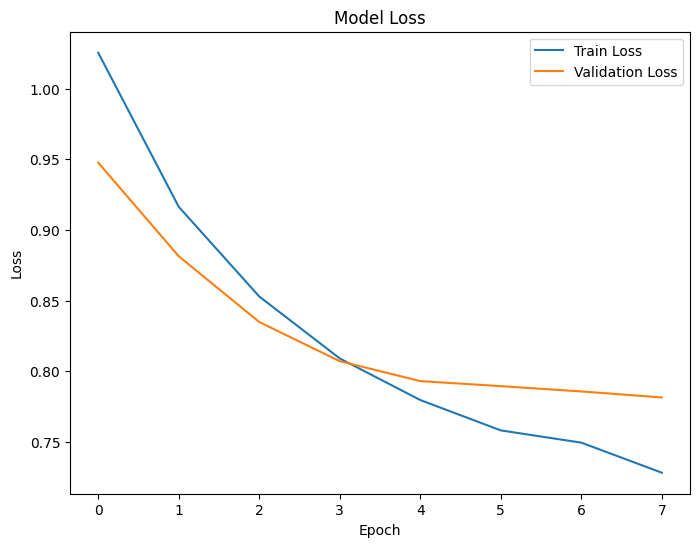

In [ ]:
# Plot della loss durante l'addestramento
plt.figure(figsize=(8, 6))
plt.plot(best_history.history['loss'], label='Train Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Salvataggio del modello
Salviamo il modello addestrato per un uso futuro.

In [ ]:
# Salvataggio del modello
best_model.save("best_model.h5")

# FINAL TEST

## Importazione delle librerie necessarie
Iniziamo importando le librerie necessarie per caricare il modello pre-addestrato e valutare le sue prestazioni sul test set.

In [ ]:
from tensorflow.keras.models import load_model
import pandas as pd
from sklearn.metrics import classification_report

## Caricamento del test set
Carichiamo il test set (`test_set.csv`) che è stato precedentemente preparato e separato dal dataset principale.

In [ ]:
# Caricamento del test set
ts = pd.read_csv("test_set.csv", index_col=False)

# Separazione delle feature (X) e del target (y)
ts_x = ts.drop('result', axis=1)
ts_y = ts['result']

## Caricamento del modello pre-addestrato
Carichiamo il modello pre-addestrato salvato in precedenza (`best_model.h5`) e visualizziamo un riepilogo della sua architettura.

In [ ]:
# Caricamento del modello pre-addestrato
best_model = load_model('best_model.h5')

# Visualizzazione del riepilogo del modello
print("Riepilogo del modello:")
print(best_model.summary())

Riepilogo del modello:


Model: "neural_net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_73 (InputLayer)          │ (None, 273)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_219 (Dense)                    │ (None, 55)                  │          15,070 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_220 (Dense)                    │ (None, 50)                  │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_73 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_221 (Dense)                    │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,025 (70.41 KB)

 Trainable params: 18,023 (70.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


## Valutazione del modello sul test set
Valutiamo le prestazioni del modello sul test set calcolando la loss e l'accuratezza.

In [ ]:
# Valutazione del modello sul test set
test_loss, test_accuracy = best_model.evaluate(ts_x, ts_y, verbose=1)

# Stampa della loss e dell'accuratezza
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6930 - loss: 0.7624  
Test loss: 0.7810816764831543
Test accuracy: 0.6714848875999451


## Report di classificazione
Generiamo un report di classificazione per valutare le prestazioni del modello in termini di precisione, recall e F1-score.

In [ ]:
# Predizione delle classi sul test set
y_pred = best_model.predict(ts_x)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generazione del report di classificazione
print("\nReport di classificazione:")
print(classification_report(ts_y, y_pred_classes))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Report di classificazione:
              precision    recall  f1-score   support

           0       0.47      0.14      0.21       161
           1       0.68      0.84      0.75       331
           2       0.70      0.78      0.74       269

    accuracy                           0.67       761
   macro avg       0.61      0.59      0.57       761
weighted avg       0.64      0.67      0.63       761



## Visualizzazione della matrice di confusione
Visualizziamo la matrice di confusione per comprendere meglio le performance del modello.

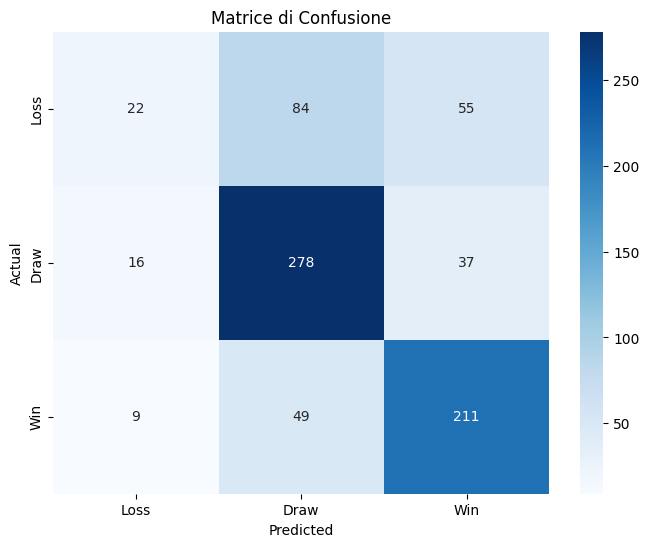

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcolo della matrice di confusione
conf_matrix = confusion_matrix(ts_y, y_pred_classes)

# Visualizzazione della matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Loss', 'Draw', 'Win'],
            yticklabels=['Loss', 'Draw', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matrice di Confusione')
plt.show()

## Salvataggio dei risultati
Salviamo i risultati della valutazione in un file di testo per un riferimento futuro.

In [ ]:
# Salvataggio dei risultati in un file di testo
with open("test_results.txt", "w") as f:
    f.write(f"Test loss: {test_loss}\n")
    f.write(f"Test accuracy: {test_accuracy}\n")
    f.write("\nReport di classificazione:\n")
    f.write(classification_report(ts_y, y_pred_classes))